Connecting to google's drive, where our folders(the DTM image) are stored. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing the Necessary Libraries **


In [ ]:
pip install rasterio

In [ ]:
pip install earthpy

**Importing the Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

Reading the image from my google drive

In [ ]:
with rio.open('/content/drive/MyDrive/6501_50m_33.tif') as dem_src:
    dtm_pre_arr = dem_src.read(1)

print("Array Shape:", dtm_pre_arr.shape)
print("Object type:", type(dtm_pre_arr))

Array Shape: (2002, 2002)
Object type: <class 'numpy.ndarray'>


Plotting the image using earthpy library

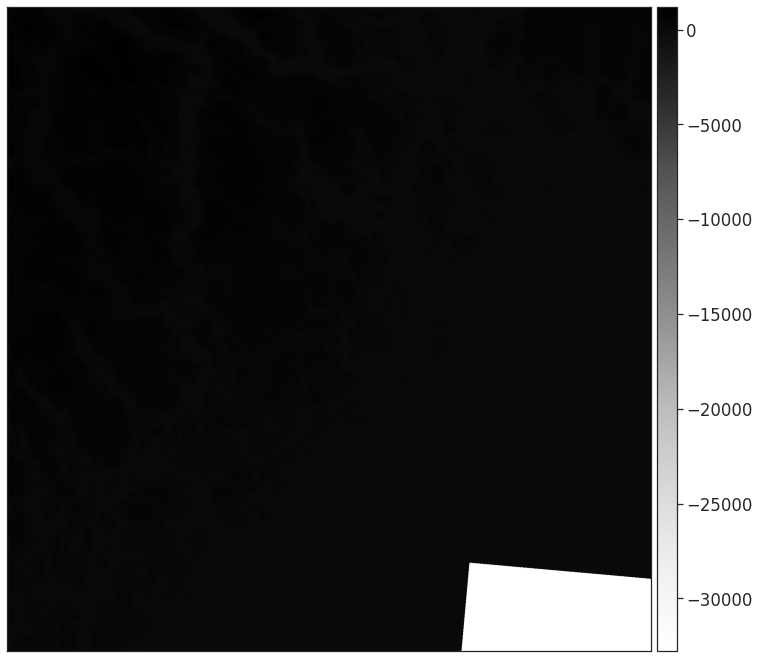

In [ ]:
ep.plot_bands(dtm_pre_arr,
              cmap="Greys")
plt.show()

The data above should represent terrain model data. However, the range of values is not what is expected.
There may be some outlier values in the data that may need to be addressed. Below we check out the min and max values of the data along with the mean and median. 

In [ ]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())
print("the mean raster value is: ",  dtm_pre_arr.mean())
print("the median raster value is: ", np.median(dtm_pre_arr))

the minimum raster value is:  -32767.0
the maximum raster value is:  1189.0417
the mean raster value is:  -909.749
the median raster value is:  217.16347



A histogram can also be helpful to look at the range of values in your data

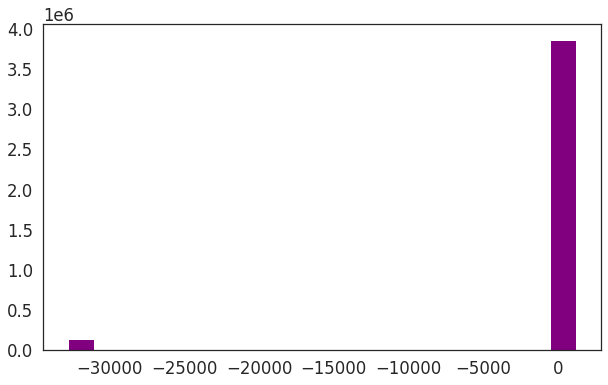

In [ ]:
ep.hist(dtm_pre_arr,
        figsize=(10, 6))
plt.show()

Looking at the minimum value of the data, there is one of two things going on that need to be fixed

-there may be no data values in the data with a negative value that are skewing the plot colors

-there also could be outlier data in the raster

we will explore the first option - that there are no data values by reading in the data and masking no data values using rasterio. To do this, we will use the masked=True parameter for the .read() function - like this:

dem_src.read(1, masked=True)

In [ ]:
with rio.open('/content/drive/MyDrive/6501_50m_33.tif') as dem_src:
    # Masked=True will mask all no data values
    dtm_pre_arr = dem_src.read(1, masked=True)

print("Numpy Array Shape:", dtm_pre_arr.shape)
print("Object type:", type(dtm_pre_arr))

Numpy Array Shape: (2002, 2002)
Object type: <class 'numpy.ma.core.MaskedArray'>


Notice that now the minimum value looks more like an elevation value (which should most often not be negative).

In [ ]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())
print("the mean raster value is: ",  dtm_pre_arr.mean())
print("the median raster value is: ", np.median(dtm_pre_arr))

the minimum raster value is:  -12.743797
the maximum raster value is:  1189.0417
the mean raster value is:  277.33966594375806
the median raster value is:  217.16346740722656


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
dtm_pre_arr

masked_array(
  data=[[784.6830444335938, 792.5850830078125, 804.3077392578125, ...,
         516.3770751953125, 496.9488830566406, 491.5],
        [776.7266235351562, 786.2244873046875, 805.1757202148438, ...,
         519.1223754882812, 496.675048828125, 491.5],
        [770.105224609375, 784.046142578125, 793.052978515625, ...,
         508.476806640625, 496.5406188964844, 491.5],
        ...,
        [202.35116577148438, 192.29248046875, 192.41015625, ..., --, --,
         --],
        [193.6693115234375, 192.37425231933594, 199.9054718017578, ...,
         --, --, --],
        [192.1072998046875, 201.28526306152344, 205.3122100830078, ...,
         --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, Fal

A histogram can also be helpful to look at the range of values in your data

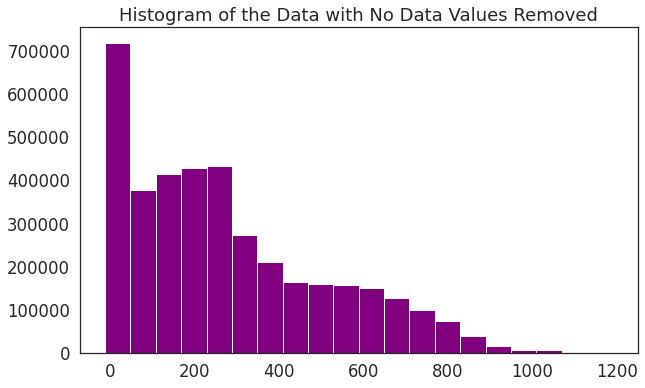

In [ ]:
ep.hist(dtm_pre_arr,
        figsize=(10, 6),
        title="Histogram of the Data with No Data Values Removed")
plt.show()

Plotting the masked array
It looks much better now

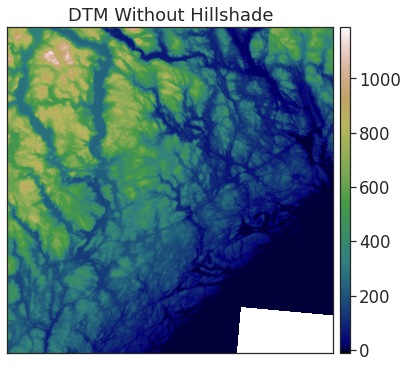

In [ ]:
# with rio.open('/content/drive/MyDrive/6501_50m_33.tif') as src:
#     dtm_pre_arr = src.read(1)
#     # Set masked values to np.nan
#     dtm_pre_arr[dtm_pre_arr < 0] = np.nan

# Plot the data
ep.plot_bands(
    dtm_pre_arr,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:620: RuntimeWarning: invalid value encountered in sqrt
  slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))


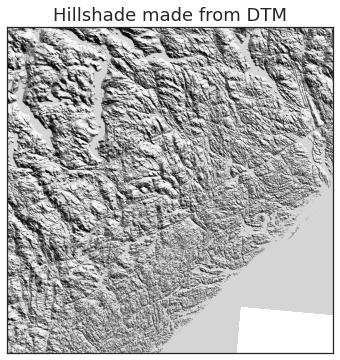

In [ ]:
hillshade = es.hillshade(dtm_pre_arr)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(10, 6),
)
plt.show()

To plot both layers together, we use the same ax object for the two layers, and then add an alpha value to the DTM hillshade image. This value makes the image more transparent.

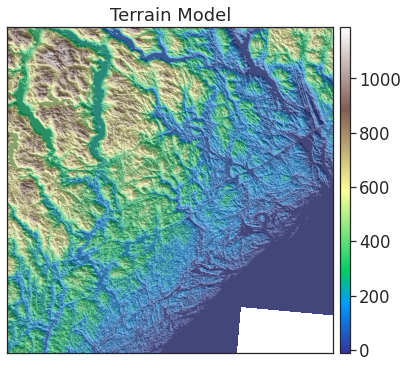

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    dtm_pre_arr,
    ax=ax,
    cmap="terrain",
    title="Terrain Model",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()